## Overflow
1. Install Dependencies
2. Test Random Environment with OpenAI Gym
3. Create a Deep Learning Model with Keras
4. Build Agent with Keras-RL
5. Reloading Agent from Memory

In [1]:
!pip3 install tensorflow
!pip3 isntall gym
!pip3 install keras
!pip3 install keras-rl2

Looking in indexes: http://pypi.douban.com/simple/
     |████████████████████████████████| 173.9 MB 1.2 MB/s eta 0:00:01     |██████████████████▋             | 101.4 MB 1.2 MB/s eta 0:01:01     |█████████████████████▌          | 116.6 MB 1.2 MB/s eta 0:00:50     |██████████████████████████████▎ | 164.8 MB 1.2 MB/s eta 0:00:08
     |████████████████████████████████| 3.3 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 851 kB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 1.2 MB/s eta 0

     |████████████████████████████████| 77 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 1.2 MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=32d1bfdc85b6ab90473dbfdd24ccfd087672cd2c9bb921eb0833455744c71c03
  Stored in directory: /Users/yanmeng/Library/Caches/pip/wheels/76/d4/7e/16cb0b889c0f014a026d097fa782ea32bb4d1fe4b731bc3b7a
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-macosx_10_15_x86_64.whl size=32816 sha256=d07a21d2f021ed993c22acbf97d5101691462850a15a86fc23c04a4101ce6b6b
  Stored in directory: /Users/yanmeng/Library/Caches/pip/wheels/a4/f6/49/e969a24d4cecb94b1c96a2d37dc4e45d96a3ec0e2e485cd11a
Successfully built termcolor wrapt
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
   

In [2]:
import gym
import random  

In [15]:
env = gym.make('CartPole-v0')
states = env.observation_space.shape[0]
actions = env.action_space.n

In [16]:
actions

2

In [17]:
episodes = 10
for episode in range(1, episodes + 1):
    state = env.reset()
    done = False
    score = 0
    while not done:
        env.render()
        action = random.choice([0, 1])
        n_state, reward, done, info = env.step(action)
        score += reward
    print('Episode:{} Socre:{}'.format(episode, score))

Episode:1 Socre:19.0
Episode:2 Socre:11.0
Episode:3 Socre:10.0
Episode:4 Socre:14.0
Episode:5 Socre:17.0
Episode:6 Socre:18.0
Episode:7 Socre:26.0
Episode:8 Socre:33.0
Episode:9 Socre:11.0
Episode:10 Socre:10.0


### create deep learning model with keras

In [18]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [34]:
def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1, states)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [35]:
model = build_model(states, actions)

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


### build agent with keras-rl

In [37]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [38]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [39]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 9:55 - reward: 1.0000

/usr/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.8/site-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 91s 9ms/step - reward: 1.0000
111 episodes - episode_reward: 89.586 [9.000, 200.000] - loss: 2.422 - mae: 18.607 - mean_q: 37.755

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 90s 9ms/step - reward: 1.0000
54 episodes - episode_reward: 184.463 [149.000, 200.000] - loss: 4.298 - mae: 38.148 - mean_q: 77.157

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 78s 8ms/step - reward: 1.0000
53 episodes - episode_reward: 189.170 [140.000, 200.000] - loss: 4.019 - mae: 39.801 - mean_q: 80.235

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 93s 9ms/step - reward: 1.0000
51 episodes - episode_reward: 194.314 [151.000, 200.000] - loss: 4.195 - mae: 38.927 - mean_q: 78.389

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 111s 11ms/step - reward: 1.0000
done, took 462.339 seconds


In [40]:
scores = dqn.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200
Episode 21: reward: 200.000, steps: 200
Episode 22: reward: 200.000, steps: 200
Episode 23: reward: 200.000, steps: 200
Episode 24: reward: 200.000, steps: 200
Episode 25: reward: 

In [41]:
_ = dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200


### reloading agent from memory

In [42]:
dqn.save_weights('dqn_weights.h5f', overwrite=True)

In [43]:
del model
del dqn
del env

In [ ]:
env = gym.make('CartPole-v0')
actions = env.action_space.n
states = env.observation_space.shape[0]
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])


In [14]:
import random
random.randint(-1, 1)

random.random() - 0.5

-0.2306080856873537

Looking in indexes: http://pypi.douban.com/simple/


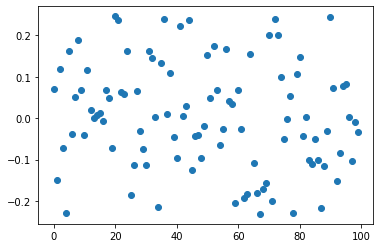

In [19]:
x = []
points = []
for i in range(100):
    x.append(i)
    points.append()

!pip3 install matplotlib
import matplotlib.pyplot as plt
plt.scatter(x, points)
plt.show()